## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns


## 2. Load and Prepare Data

In [3]:
df_raw = pd.read_csv('carros-info-tecnica.csv')
df_clean = df_raw.dropna().copy()

# Standardize text columns (lowercase, remove spaces)
str_cols = df_clean.select_dtypes(include=["object", "string"]).columns
df_clean[str_cols] = df_clean[str_cols].apply(lambda x: x.str.lower().str.strip())

# Encode categorical variables (turn text into 0/1 columns)
df_encoded = pd.get_dummies(df_clean, columns=["Marca", "Modelo", "Câmbio"]).copy()

# Separate predictors (X) and target (y)
y = df_encoded["Velocidade máxima"]
X = df_encoded.drop(columns=["Velocidade máxima"])

# Standardize predictors (mean = 0, std = 1)
scaled_X = scale(X)


## 3. PCA with all Components

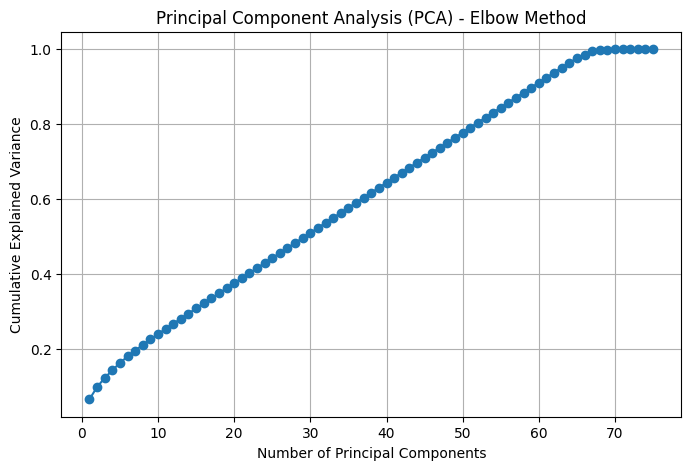

Component 1: 0.0663
Component 2: 0.0987
Component 3: 0.1231
Component 4: 0.1435
Component 5: 0.1633
Component 6: 0.1803
Component 7: 0.1962
Component 8: 0.2111
Component 9: 0.2259
Component 10: 0.2402
Component 11: 0.2540
Component 12: 0.2677
Component 13: 0.2814
Component 14: 0.2950
Component 15: 0.3085
Component 16: 0.3220
Component 17: 0.3355
Component 18: 0.3490
Component 19: 0.3625
Component 20: 0.3760
Component 21: 0.3894
Component 22: 0.4029
Component 23: 0.4163
Component 24: 0.4297
Component 25: 0.4432
Component 26: 0.4566
Component 27: 0.4700
Component 28: 0.4834
Component 29: 0.4968
Component 30: 0.5102
Component 31: 0.5235
Component 32: 0.5369
Component 33: 0.5503
Component 34: 0.5637
Component 35: 0.5771
Component 36: 0.5905
Component 37: 0.6038
Component 38: 0.6172
Component 39: 0.6306
Component 40: 0.6440
Component 41: 0.6573
Component 42: 0.6707
Component 43: 0.6841
Component 44: 0.6974
Component 45: 0.7108
Component 46: 0.7241
Component 47: 0.7375
Component 48: 0.7509
C

In [4]:
pca = PCA()
pca_data = pca.fit_transform(scaled_X)

# Cumulative explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance (elbow method)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Principal Component Analysis (PCA) - Elbow Method')
plt.grid(True)
plt.show()

# Print explained variance per component
for i, v in enumerate(explained_var):
    print(f"Component {i+1}: {v:.4f}")


## 4. Determine Optimal Number of Components

In [5]:
# (choose smallest number explaining at least 90% of total variance)
n_optimal = np.argmax(explained_var >= 0.9) + 1
print(f"\nOptimal number of components: {n_optimal}")



Optimal number of components: 60


## 5. Linear Regression with Optimal Number of PCA Components

In [6]:
pca_optimal = PCA(n_components=n_optimal)
X_pca = pca_optimal.fit_transform(scaled_X)

reg_optimal = LinearRegression()
reg_optimal.fit(X_pca, y)
y_pred_optimal = reg_optimal.predict(X_pca)

print("\nR² with optimal components:", reg_optimal.score(X_pca, y))



R² with optimal components: 0.8046610891089043


## 6. PCA with only 1 Component

In [7]:
pca_1 = PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(scaled_X)


## 7. Linear Regression with 1 Component

In [8]:
reg_1 = LinearRegression()
reg_1.fit(X_pca_1, y)
y_pred_1 = reg_1.predict(X_pca_1)

r2_1 = reg_1.score(X_pca_1, y)
print("\nR² with 1 component:", r2_1)



R² with 1 component: 0.551352120839814


## 8. Plot Regression with 1 Component

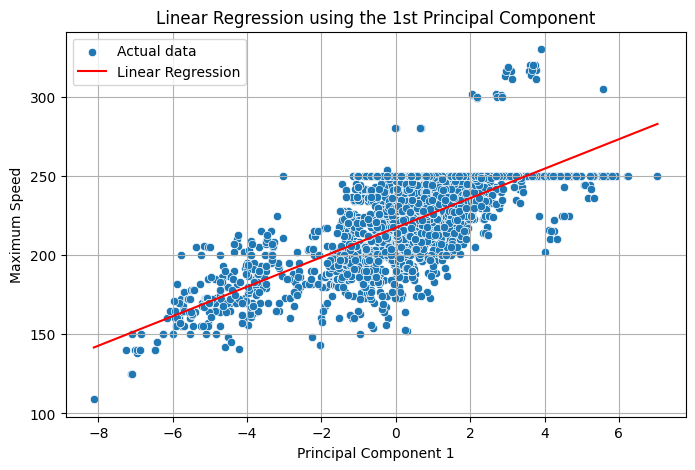

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca_1.flatten(), y=y, label='Actual data')
sns.lineplot(x=X_pca_1.flatten(), y=y_pred_1, color='red', label='Linear Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Maximum Speed')
plt.title('Linear Regression using the 1st Principal Component')
plt.legend()
plt.grid(True)
plt.show()
